In [3]:
from mmdet.apis import init_detector, inference_detector
# , show_result_pyplot
import mmcv

In [8]:
import os.path as osp
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

def color_val_matplotlib(color):
    color = mmcv.color_val(color)
    color = [color / 255 for color in color[::-1]]
    return tuple(color)

def show_result_pyplot(model,
                       img,
                       result,
                       score_thr=0.3,
                       fig_size=(15, 10),
                       title='result'):

    if hasattr(model, 'module'):
        model = model.module

    img = mmcv.imread(img)
    img = img.copy()
    bboxes, scores, offsets, masks = result

    labels = [
        np.full(bbox.shape[0], i, dtype=np.int32)
        for i, bbox in enumerate(bboxes)
    ]
    labels = np.concatenate(labels)

    if score_thr > 0:
        inds = scores > score_thr
        labels = labels[inds]

    bbox_color = color_val_matplotlib((72, 101, 241))
    text_color = color_val_matplotlib((72, 101, 241))

    img = mmcv.bgr2rgb(img)
    img = np.ascontiguousarray(img)

    plt.figure(title, figsize=fig_size)
    plt.title(title)
    plt.axis('off')
    ax = plt.gca()

    polygons = []
    color = []
    for _, (bbox, label) in enumerate(zip(bboxes, labels)):
        bbox_int = bbox.astype(np.int32)
        poly = [[bbox_int[0], bbox_int[1]], [bbox_int[0], bbox_int[3]],
                [bbox_int[2], bbox_int[3]], [bbox_int[2], bbox_int[1]]]
        np_poly = np.array(poly).reshape((4, 2))
        polygons.append(Polygon(np_poly))
        color.append(bbox_color)
        label_text = f'class {label}'
        if len(bbox) > 4:
            label_text += f'|{bbox[-1]:.02f}'
        ax.text(
            bbox_int[0],
            bbox_int[1],
            f'{label_text}',
            bbox={
                'facecolor': 'black',
                'alpha': 0.8,
                'pad': 0.7,
                'edgecolor': 'none'
            },
            color=text_color,
            fontsize=13,
            verticalalignment='top',
            horizontalalignment='left')

    p = PatchCollection(
        polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)

    dir_name = osp.abspath(osp.dirname('./out'))
    mmcv.mkdir_or_exist(dir_name)
    plt.savefig('out.jpg')

    plt.show()

In [4]:
config_file = '../configs/serialgfl/serialgfl_r50_fpn_1x_coco_[DGQP-c64].py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = '../work_dirs/serialgfl_r50_fpn_1x_coco_[DGQP-c64]/epoch_12.pth'

In [5]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

The model and loaded state dict do not match exactly

unexpected key in source state_dict: bbox_head.off_convs.0.conv.weight, bbox_head.off_convs.0.gn.weight, bbox_head.off_convs.0.gn.bias, bbox_head.off_convs.1.conv.weight, bbox_head.off_convs.1.gn.weight, bbox_head.off_convs.1.gn.bias, bbox_head.off_convs.2.conv.weight, bbox_head.off_convs.2.gn.weight, bbox_head.off_convs.2.gn.bias



In [6]:
# test a single image
img = 'ski.jpg'
result = inference_detector(model, img)

/share/BACKUP/kit/mmdetection-v2.8.0/mmdet/datasets/utils.py:60: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


ModuleAttributeError: 'SERIALGFLHead' object has no attribute 'traing'

/share/BACKUP/kit/mmdetection-v2.8.0/mmdet/apis/inference.py:185: UserWarning: "block" will be deprecated in v2.9.0,Please use "wait_time"
  warnings.warn('"block" will be deprecated in v2.9.0,'
/share/BACKUP/kit/mmdetection-v2.8.0/mmdet/core/visualization/image.py:72: UserWarning: "font_scale" will be deprecated in v2.9.0,Please use "font_size"
  warnings.warn('"font_scale" will be deprecated in v2.9.0,'


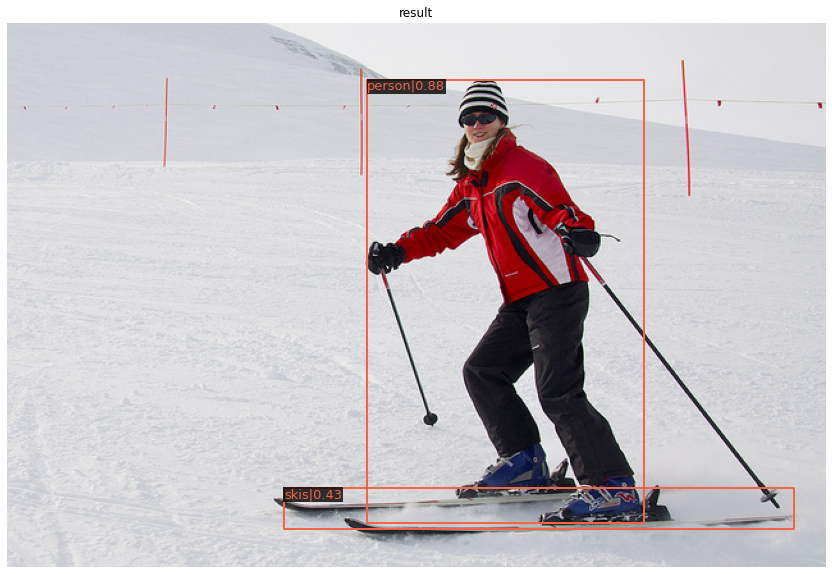

In [ ]:
# show the results
show_result_pyplot(model, img, result)